In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

In [2]:
application_data = pd.read_csv(r"F:\stige projects\loan case study\kaggel\application_data.csv")
previous_application = pd.read_csv(r"F:\stige projects\loan case study\kaggel\previous_application.csv")
columns_description = pd.read_csv(r"F:\stige projects\loan case study\kaggel\columns_description.csv",skiprows =1)

In [3]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
combined_df= pd.merge(application_data, previous_application, on='SK_ID_CURR', how='inner')

combined_df.sort_values(by=['SK_ID_CURR','SK_ID_PREV'],ascending=[True,True],inplace=True)
display(combined_df.head(10))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,

In [5]:
combined_df['DAYS_BIRTH'] = abs(combined_df['DAYS_BIRTH'])
combined_df['DAYS_ID_PUBLISH'] = abs(combined_df['DAYS_ID_PUBLISH'])
combined_df['DAYS_ID_PUBLISH'] = abs(combined_df['DAYS_ID_PUBLISH'])
combined_df['DAYS_LAST_PHONE_CHANGE'] = abs(combined_df['DAYS_LAST_PHONE_CHANGE'])

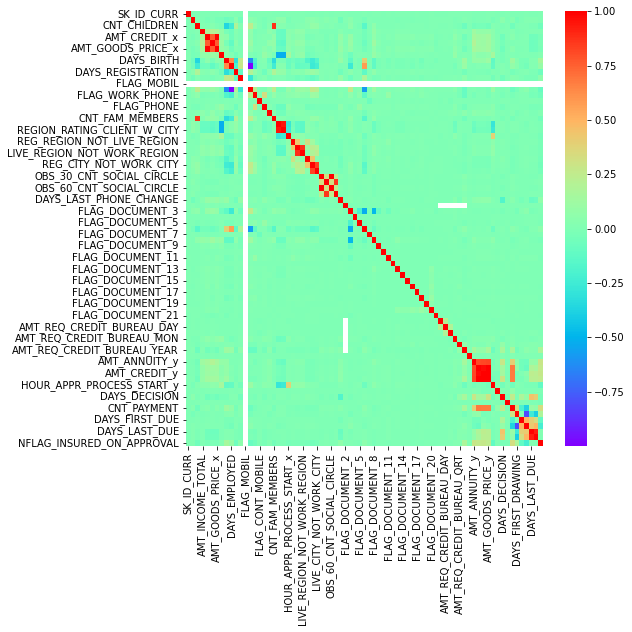

In [6]:
corrmat = combined_df.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [7]:
corrmat = combined_df.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
4786,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
2278,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
984,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4787,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
454,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
4711,AMT_CREDIT_y,AMT_APPLICATION,0.98
1519,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
5547,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1823,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.88
1352,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88


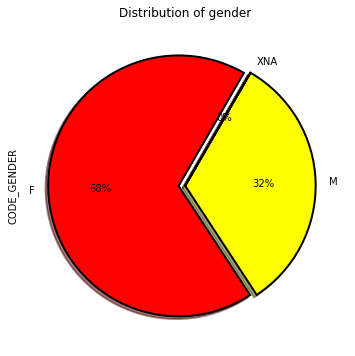

In [8]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

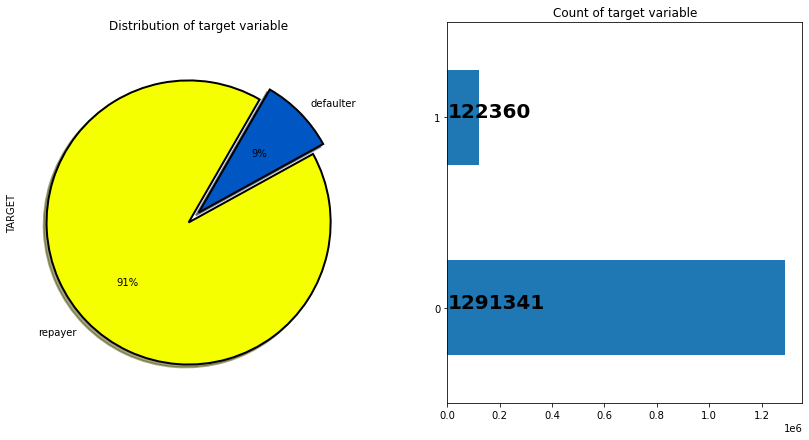

In [9]:
plt.figure(figsize=(14,7))
plt.subplot(121)
combined_df["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = combined_df["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(combined_df["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()

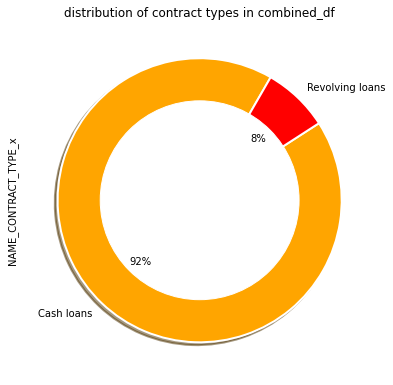

In [10]:
plt.figure(figsize=(14,7))
plt.subplot(121)
combined_df["NAME_CONTRACT_TYPE_x"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in combined_df")

plt.show()

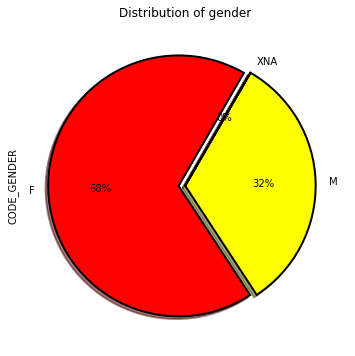

In [11]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

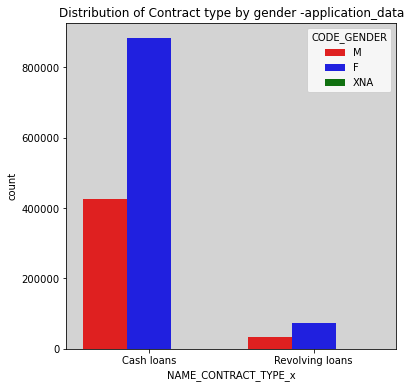

In [12]:
fig  = plt.figure(figsize=(13,6))
plt.subplot(121)
ax = sns.countplot("NAME_CONTRACT_TYPE_x",hue="CODE_GENDER",data=combined_df,palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender -application_data")


plt.show()

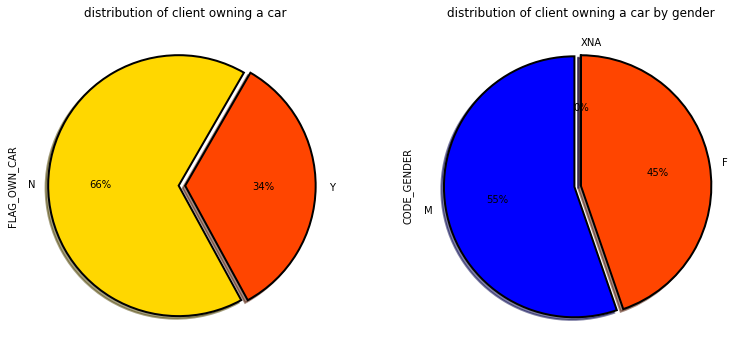

In [13]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
combined_df["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

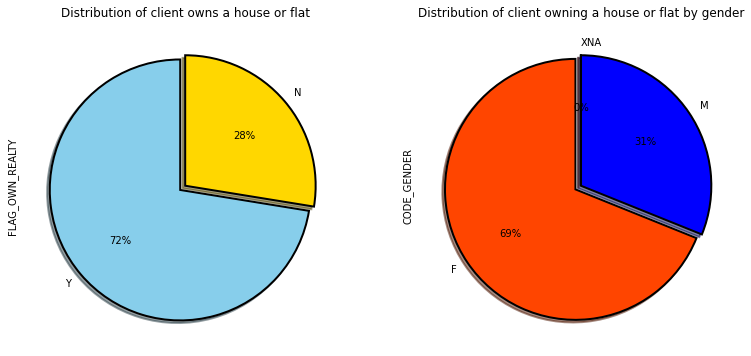

In [14]:
plt.figure(figsize=(13,6))
plt.subplot(121)
combined_df["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
combined_df[combined_df["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

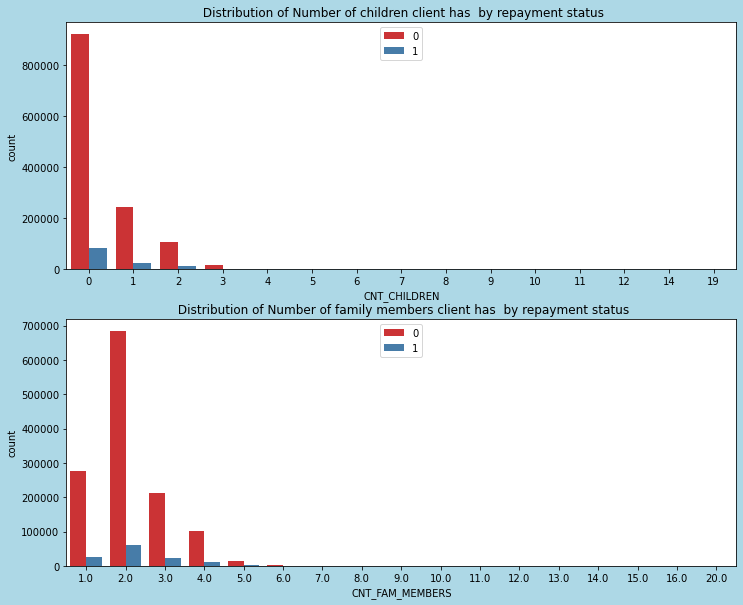

In [15]:
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(combined_df["CNT_CHILDREN"],palette="Set1",hue=combined_df["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of children client has  by repayment status")
plt.subplot(212)
sns.countplot(combined_df["CNT_FAM_MEMBERS"],palette="Set1",hue=combined_df["TARGET"])
plt.legend(loc="upper center")
plt.title(" Distribution of Number of family members client has  by repayment status")
fig.set_facecolor("lightblue")

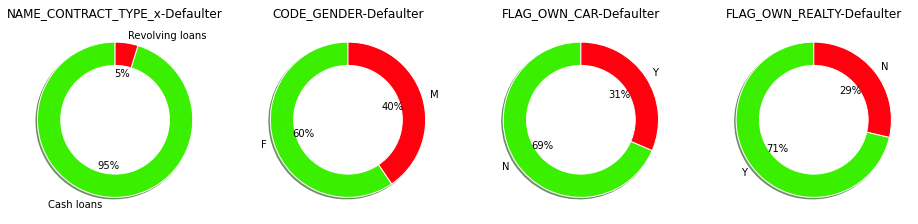

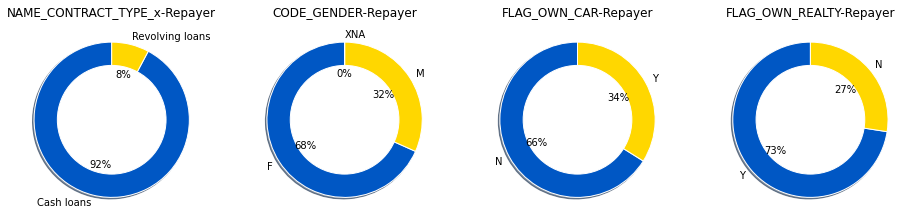

In [16]:
default = combined_df[combined_df["TARGET"]==1][[ 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = combined_df[combined_df["TARGET"]==0][[ 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE_x', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")


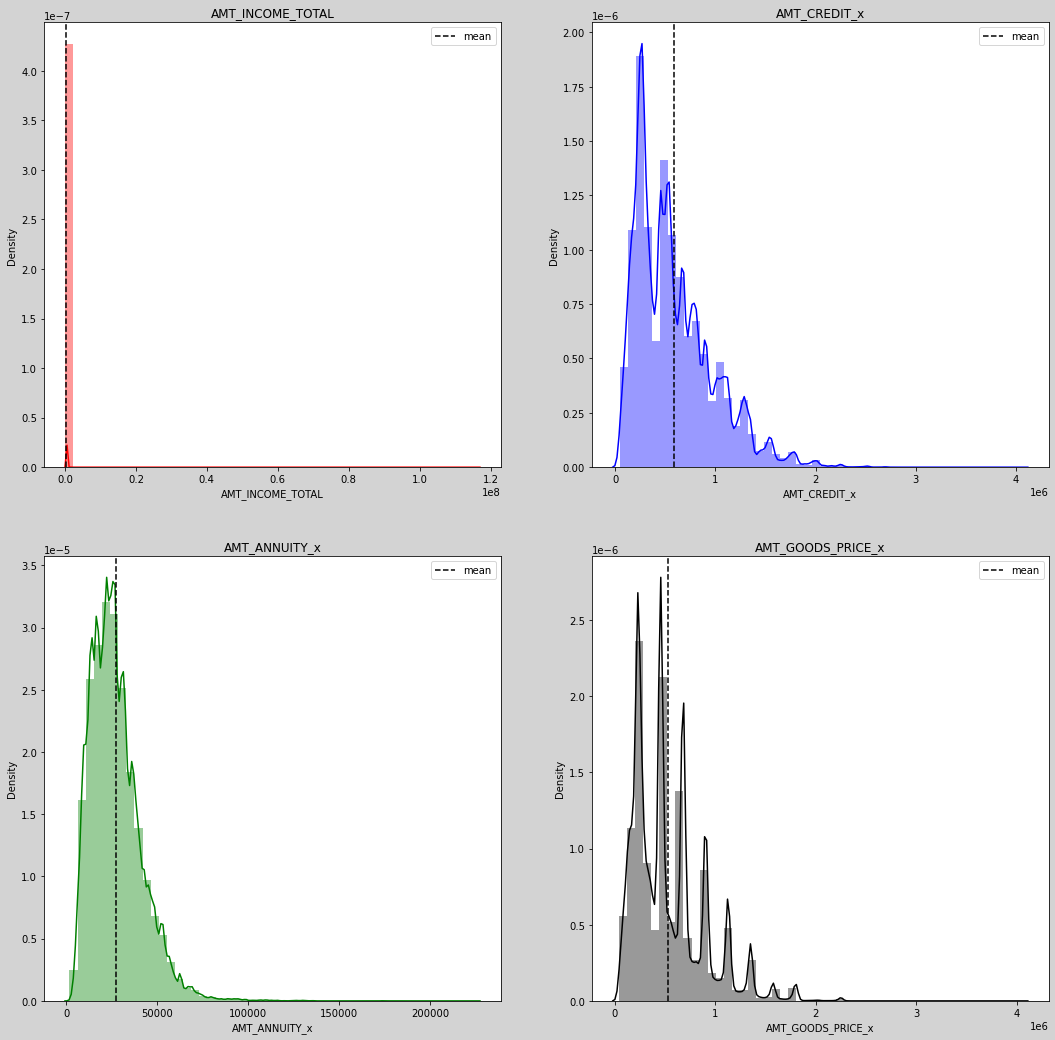

In [17]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(combined_df[combined_df[i].notnull()][i],color=k)
    plt.axvline(combined_df[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

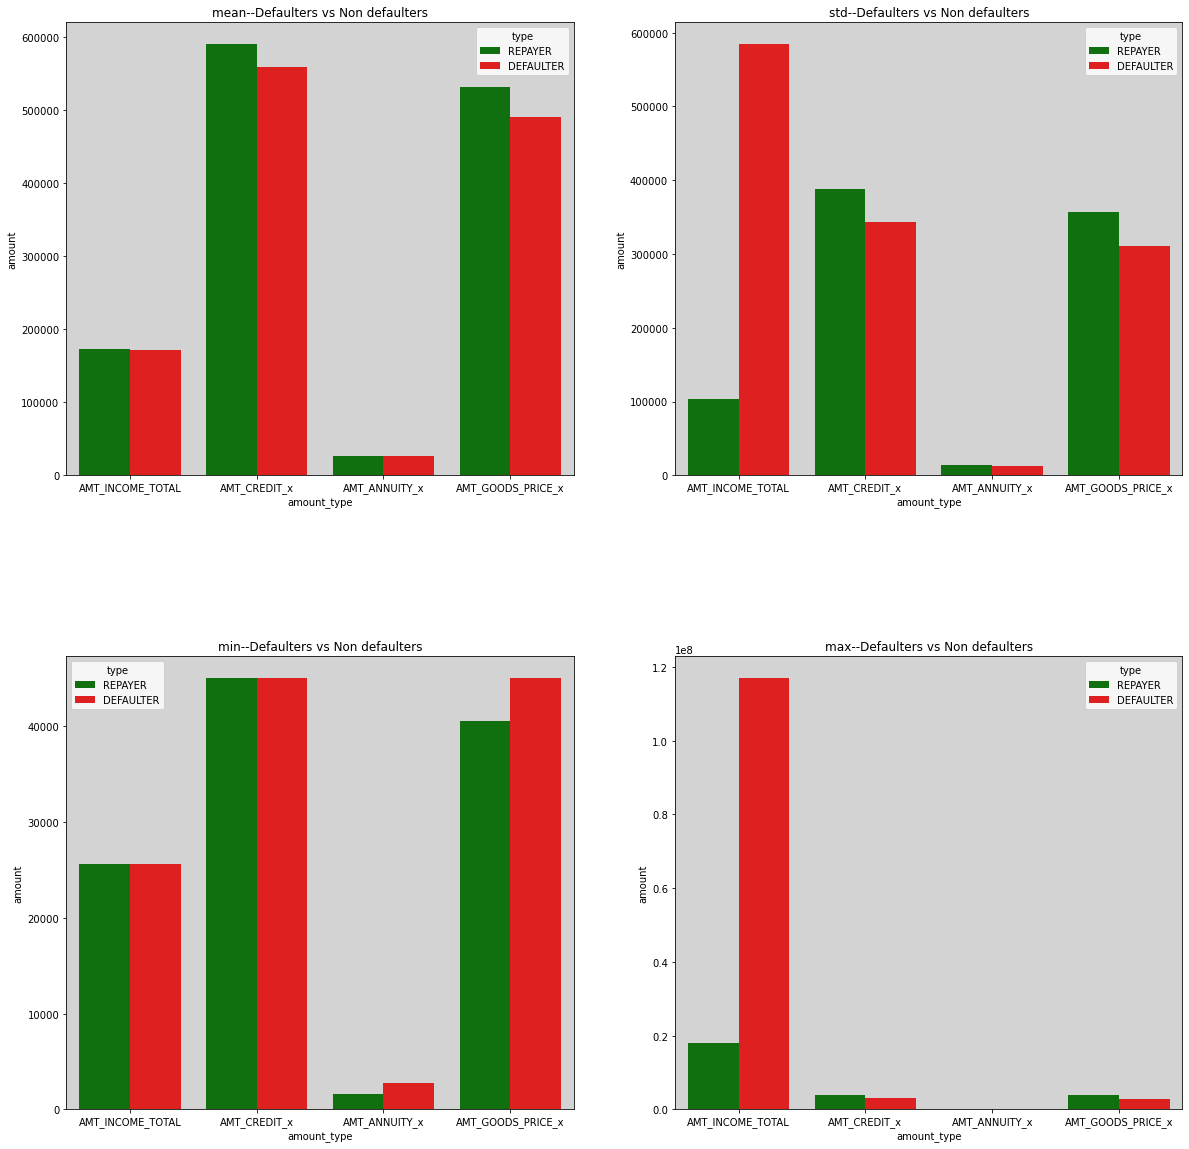

In [18]:
df = combined_df.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(20,20))

for i,j in itertools.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")


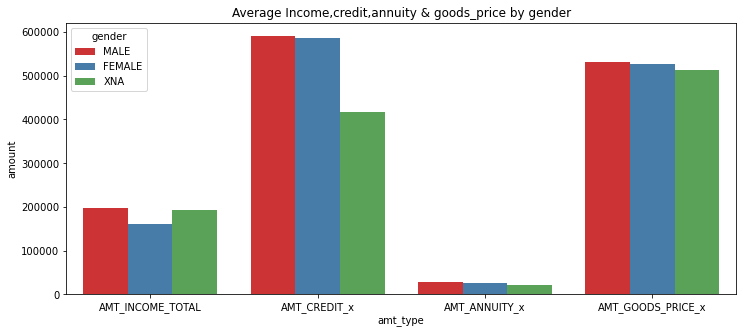

In [19]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x','AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']

df1 = combined_df.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()


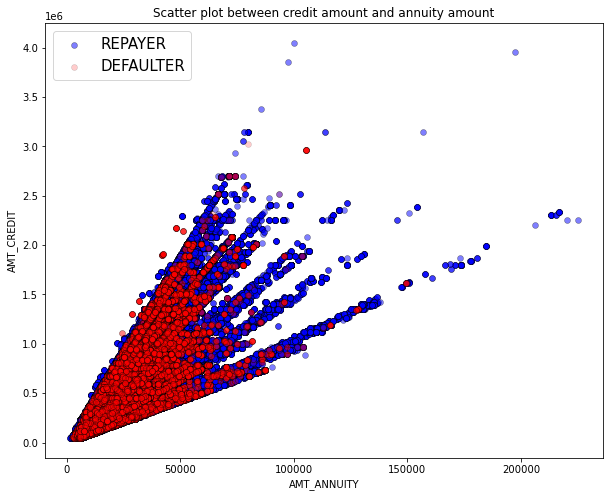

In [20]:
fig = plt.figure(figsize=(10,8))
plt.scatter(combined_df[combined_df["TARGET"]==0]['AMT_ANNUITY_x'],combined_df[combined_df["TARGET"]==0]['AMT_CREDIT_x'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(combined_df[combined_df["TARGET"]==1]['AMT_ANNUITY_x'],combined_df[combined_df["TARGET"]==1]['AMT_CREDIT_x'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

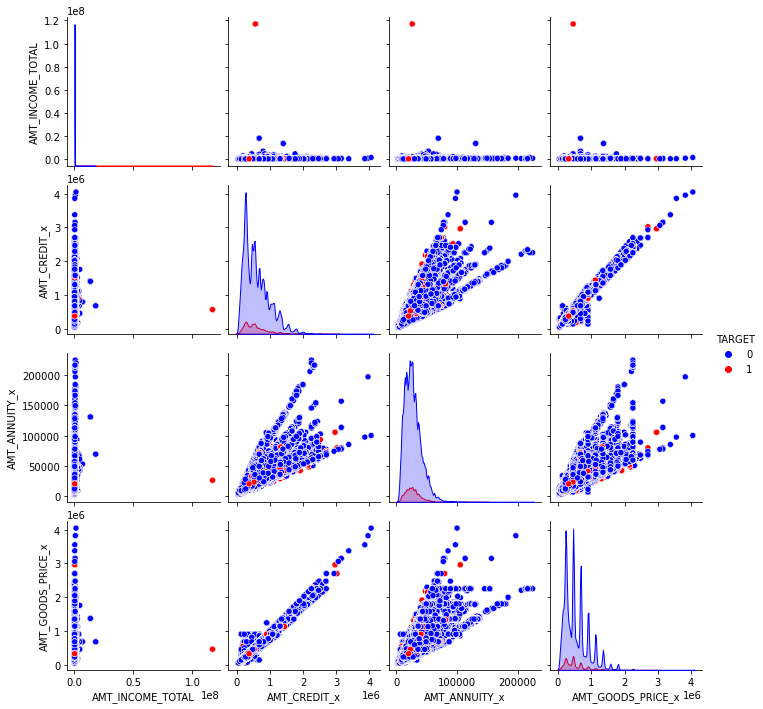

In [21]:
amt = combined_df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT_x',
                         'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE_x"].notnull()) & (amt["AMT_ANNUITY_x"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

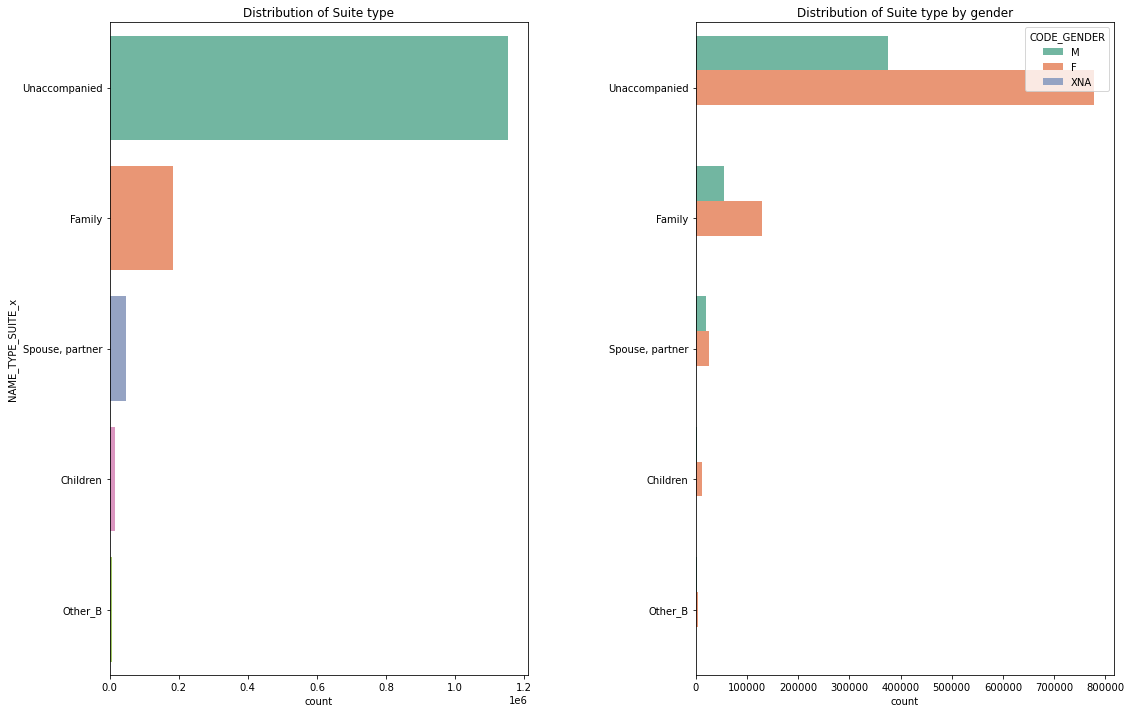

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_TYPE_SUITE_x"],
              hue=combined_df["CODE_GENDER"],palette="Set2",
              order=combined_df["NAME_TYPE_SUITE_x"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

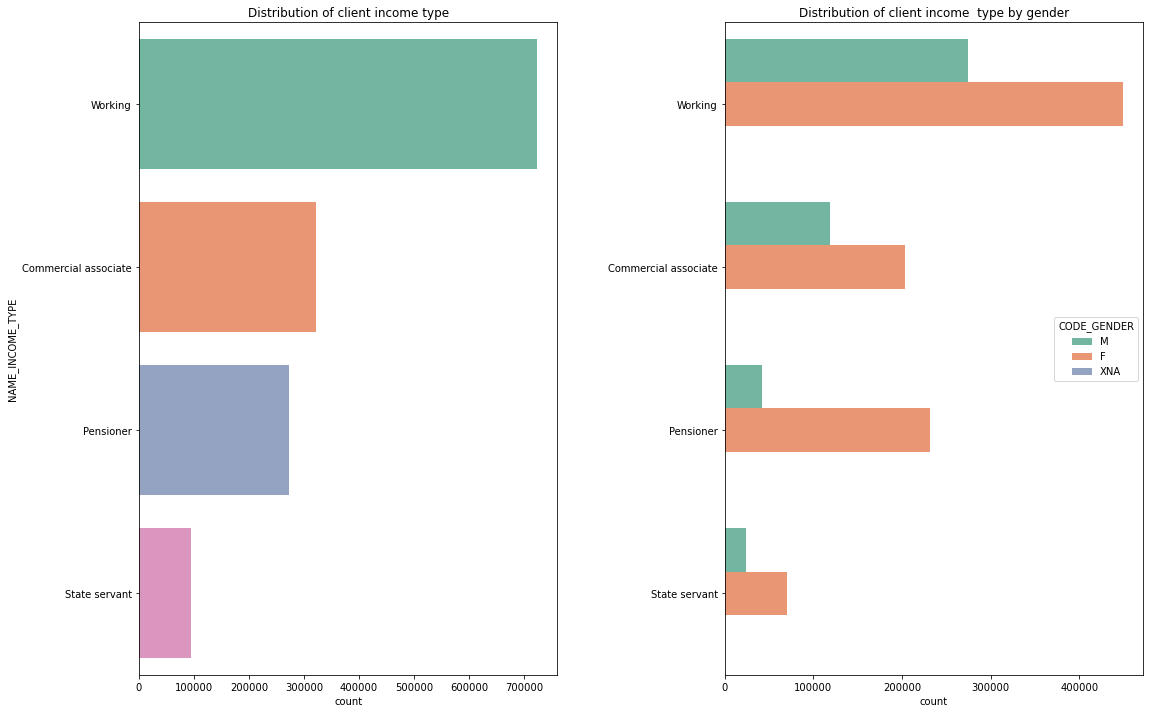

In [23]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=combined_df["NAME_INCOME_TYPE"],
              palette="Set2",
              order=combined_df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=combined_df["NAME_INCOME_TYPE"],
              hue=combined_df["CODE_GENDER"],
              palette="Set2",
              order=combined_df["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

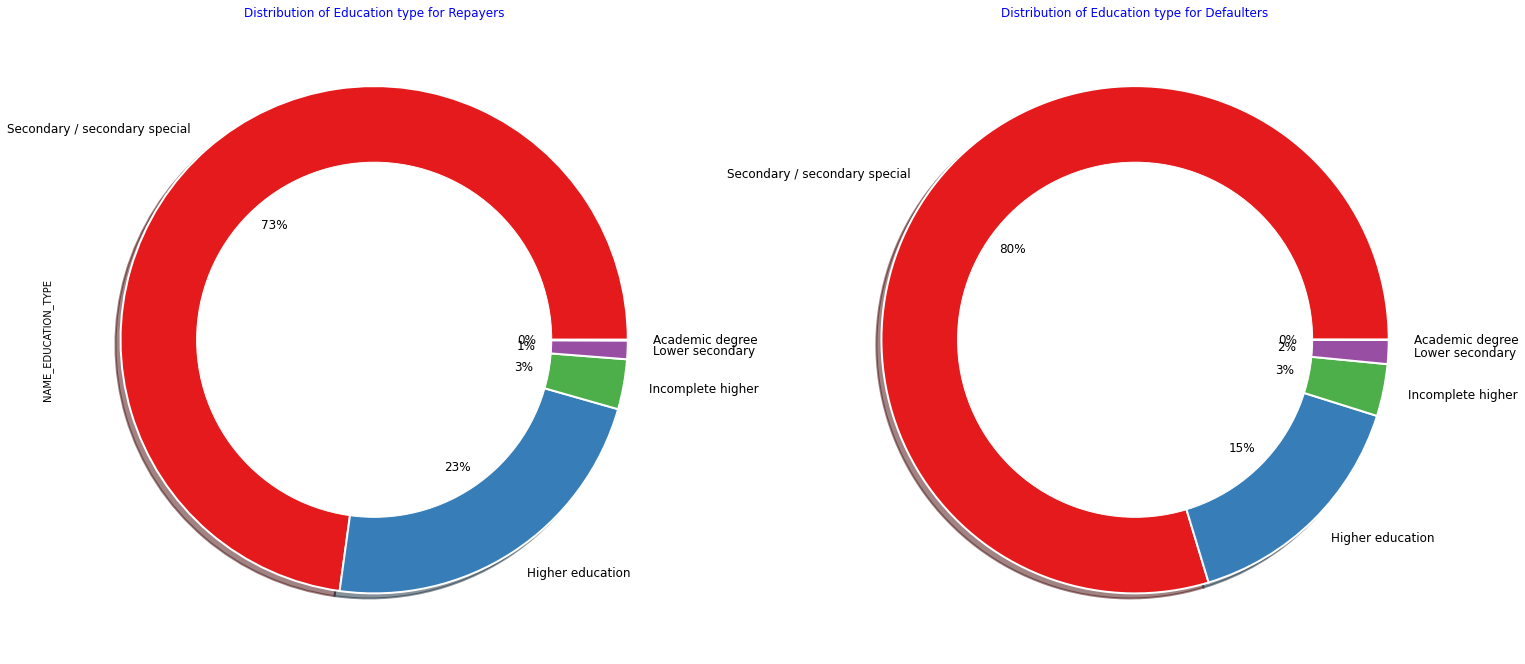

In [24]:
plt.figure(figsize=(25,25))
plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

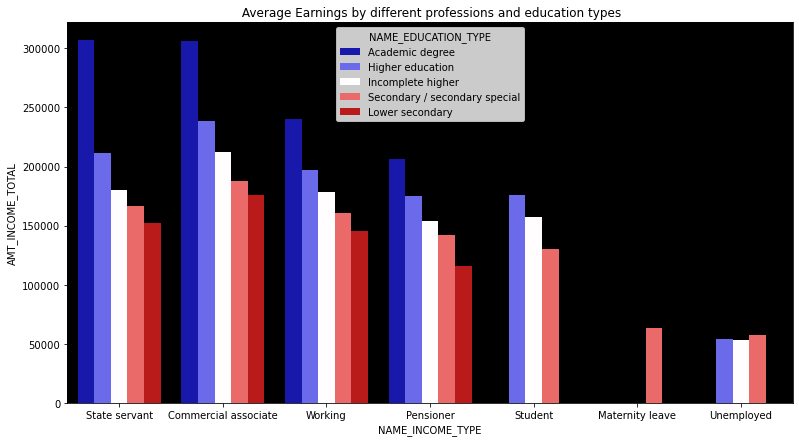

In [25]:
edu = combined_df.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
fig = plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
ax.set_facecolor("k")
plt.title(" Average Earnings by different professions and education types")
plt.show()

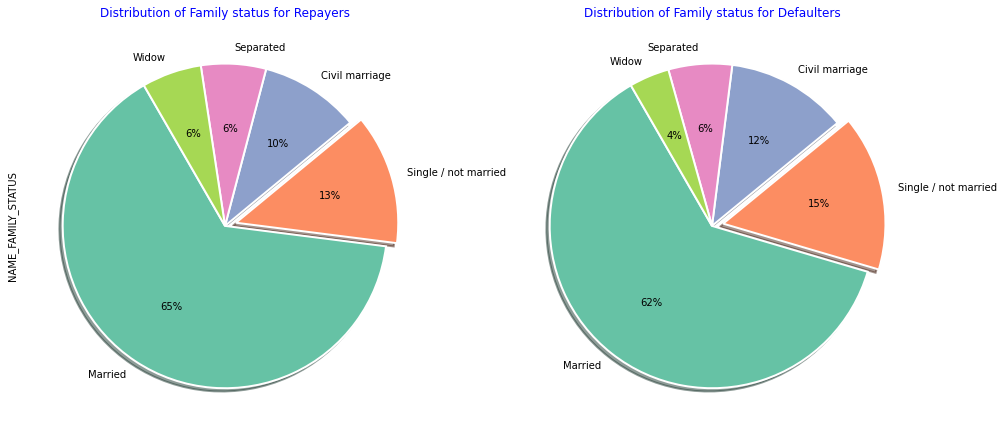

In [26]:
plt.figure(figsize=(16,8))
plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

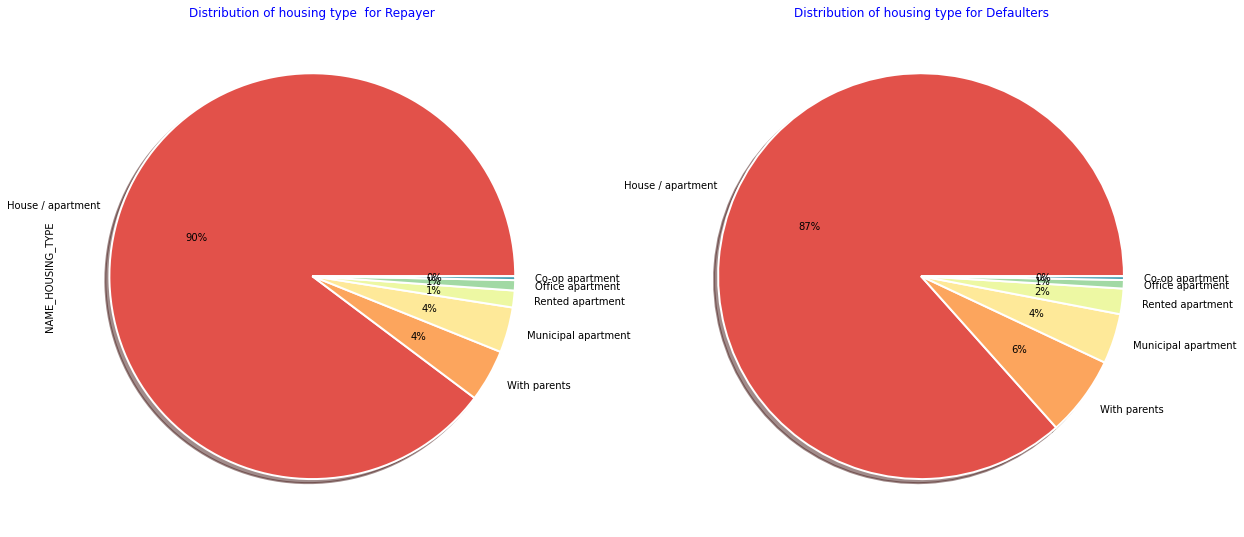

In [27]:
plt.figure(figsize=(20,20))
plt.subplot(121)
combined_df[combined_df["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
combined_df[combined_df["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()

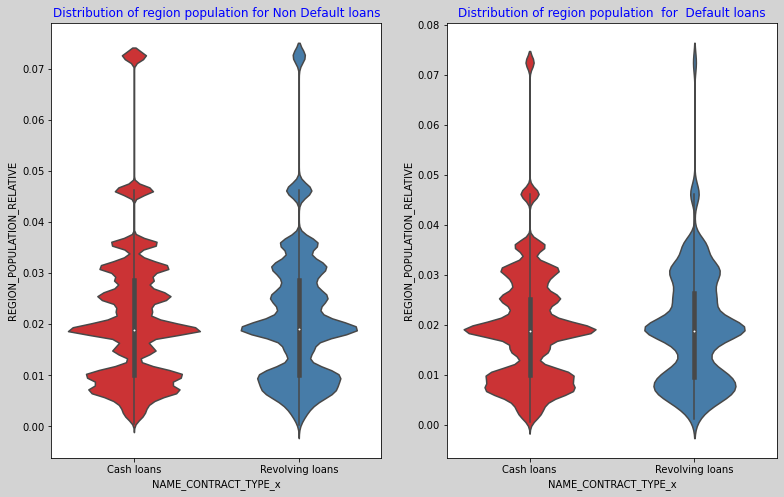

In [28]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=combined_df[combined_df["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=combined_df[combined_df["TARGET"]==0]["NAME_CONTRACT_TYPE_x"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = combined_df[combined_df["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=combined_df[combined_df["TARGET"]==1]["NAME_CONTRACT_TYPE_x"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")


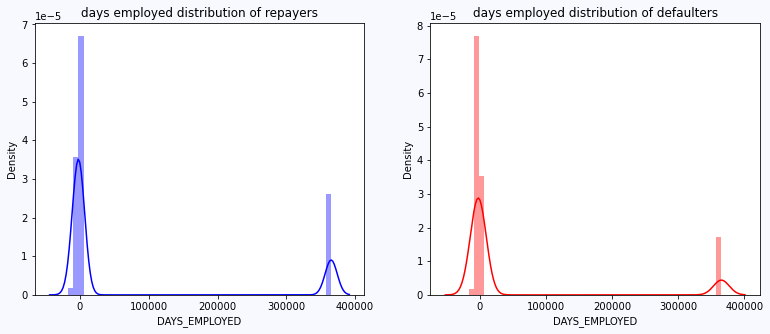

In [30]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(combined_df[combined_df["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(combined_df[combined_df["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

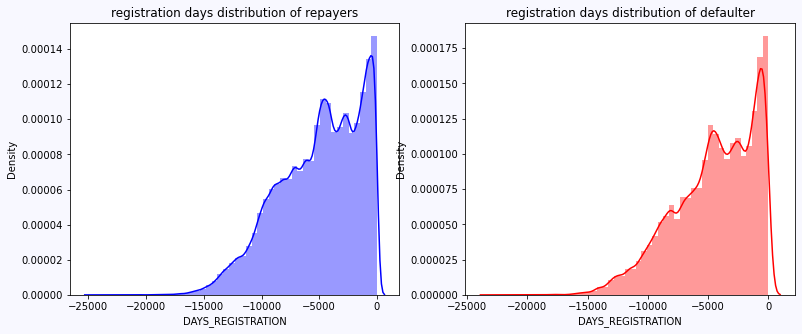

In [31]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(combined_df[combined_df["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(combined_df[combined_df["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

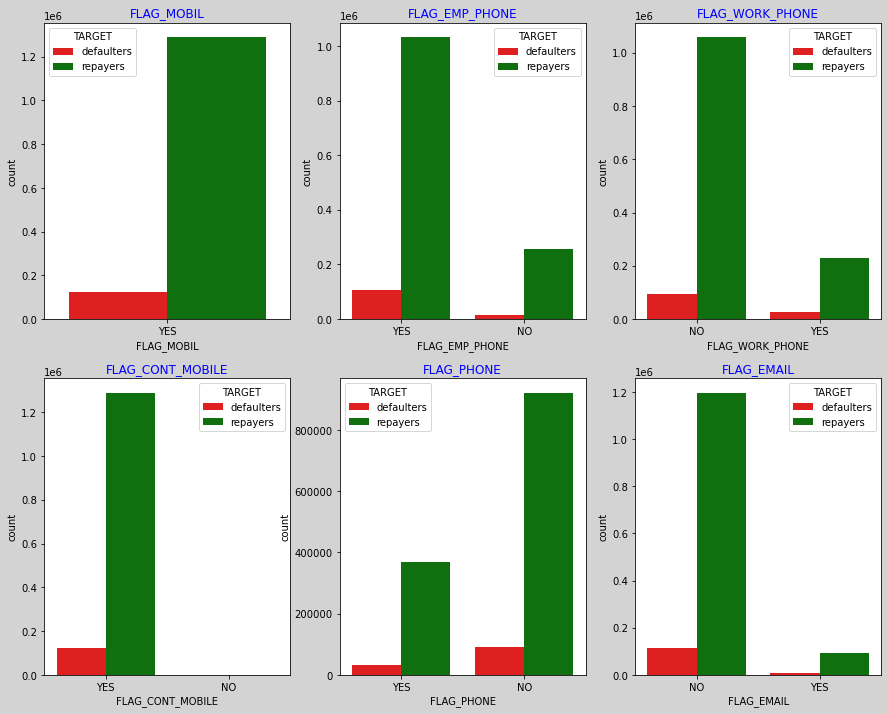

In [32]:
x   = combined_df[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")

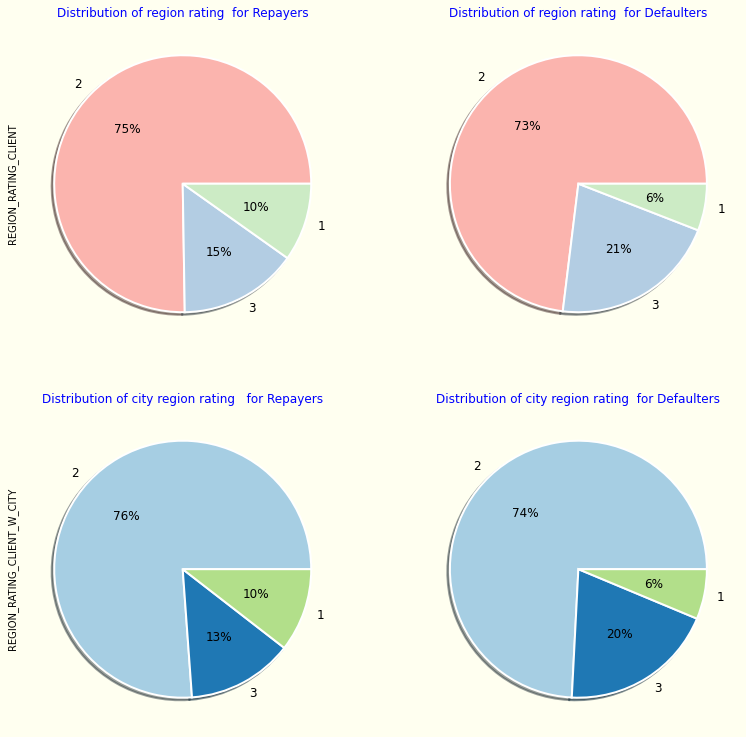

In [33]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
combined_df[combined_df["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
combined_df[combined_df["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
combined_df[combined_df["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
combined_df[combined_df["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

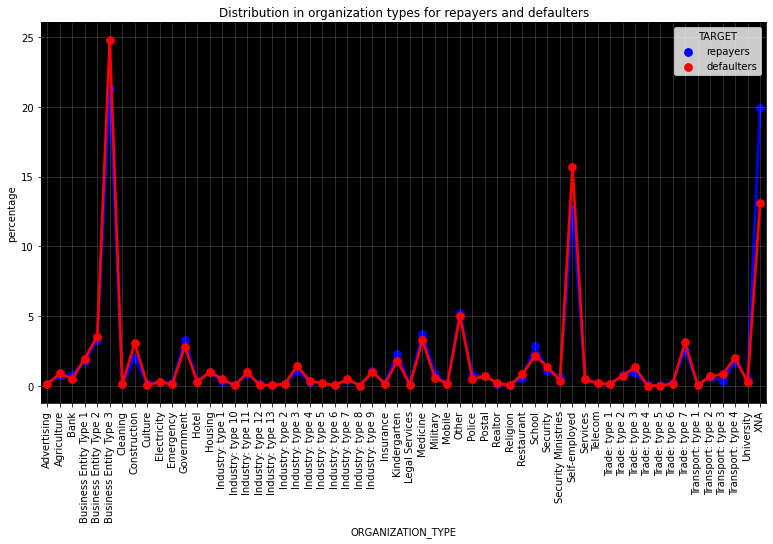

In [34]:
org = combined_df.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",
                   data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

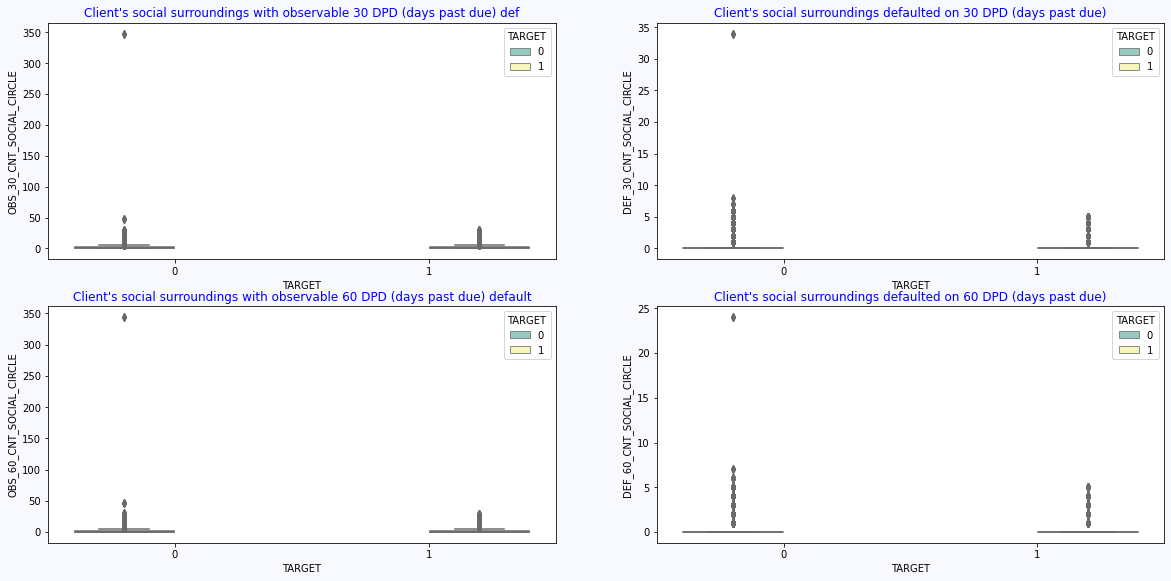

In [35]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=combined_df,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")
plt.subplot(422)
sns.boxplot(data=combined_df,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")
plt.subplot(423)
sns.boxplot(data=combined_df,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")
plt.subplot(424)
sns.boxplot(data=combined_df,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")
fig.set_facecolor("ghostwhite")

AttributeError: module 'seaborn' has no attribute 'lvplot'

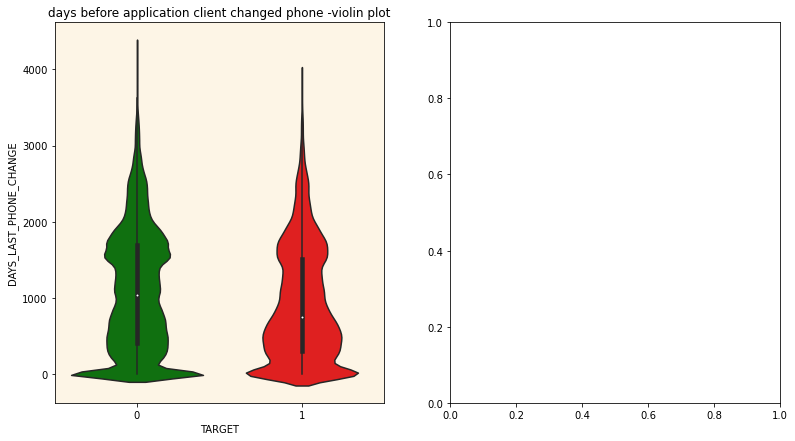

In [36]:
plt.figure(figsize=(13,7))
plt.subplot(121)
ax = sns.violinplot(combined_df["TARGET"],
                    combined_df["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -violin plot")
plt.subplot(122)
ax1 = sns.lvplot(combined_df["TARGET"],
                 combined_df["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

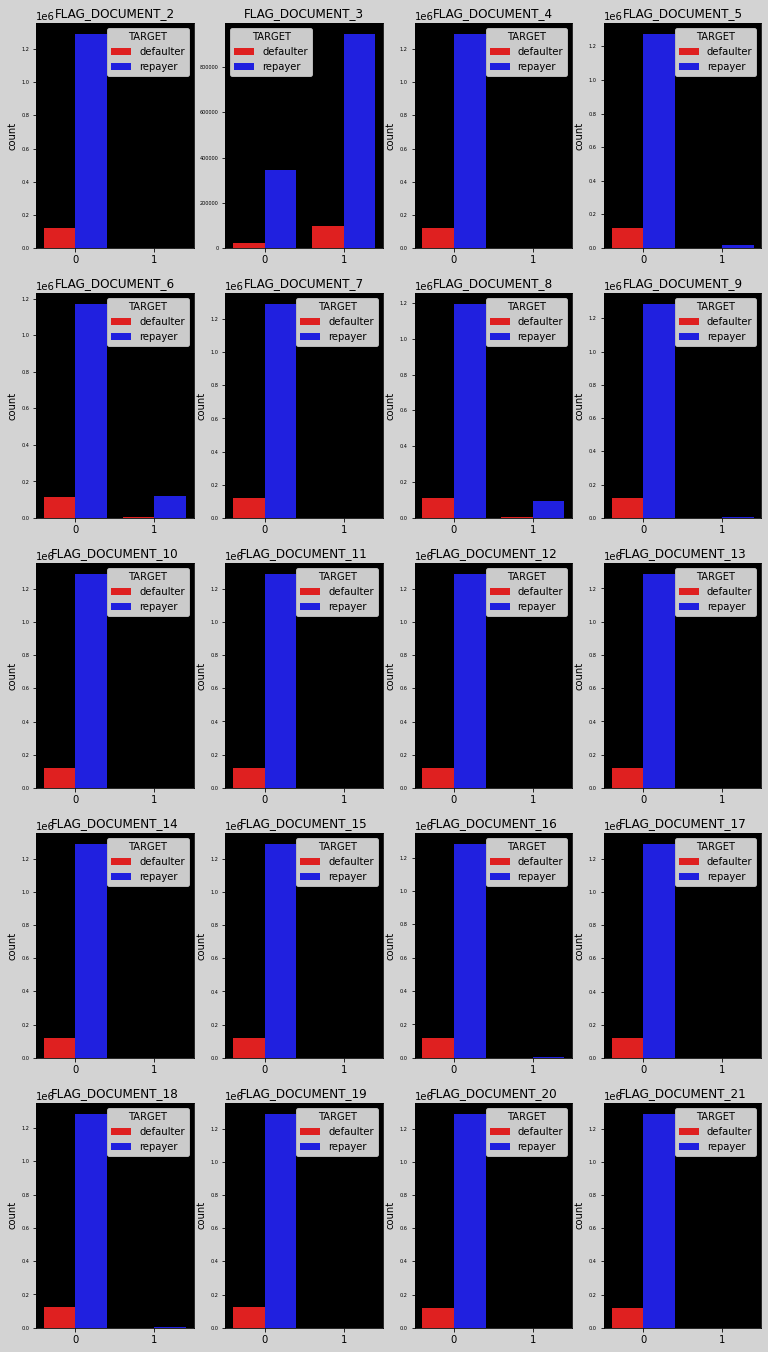

In [37]:
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = combined_df[cols+["TARGET"]]

length = len(cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(13,24))
fig.set_facecolor("lightgrey")
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")

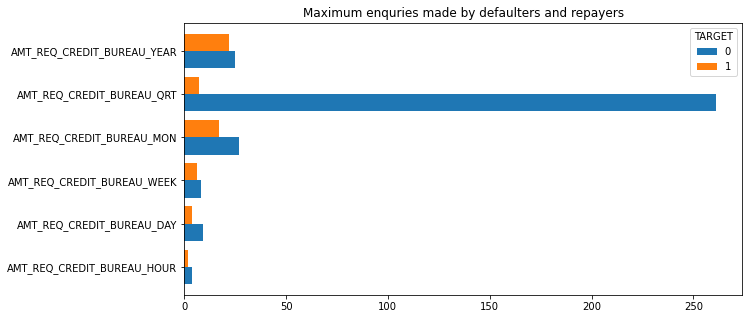

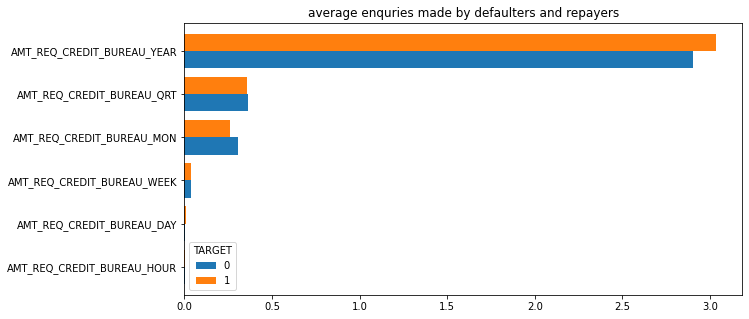

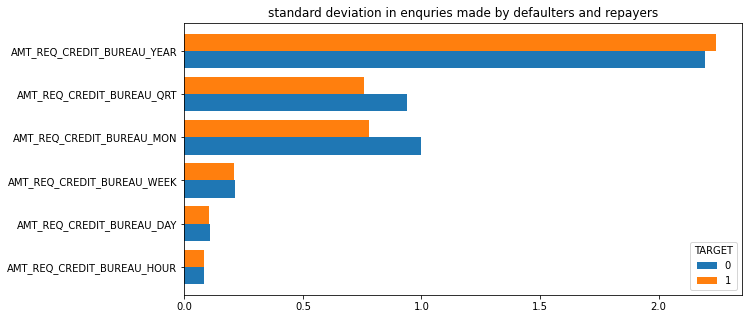

In [38]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
combined_df.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
combined_df.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
combined_df.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()

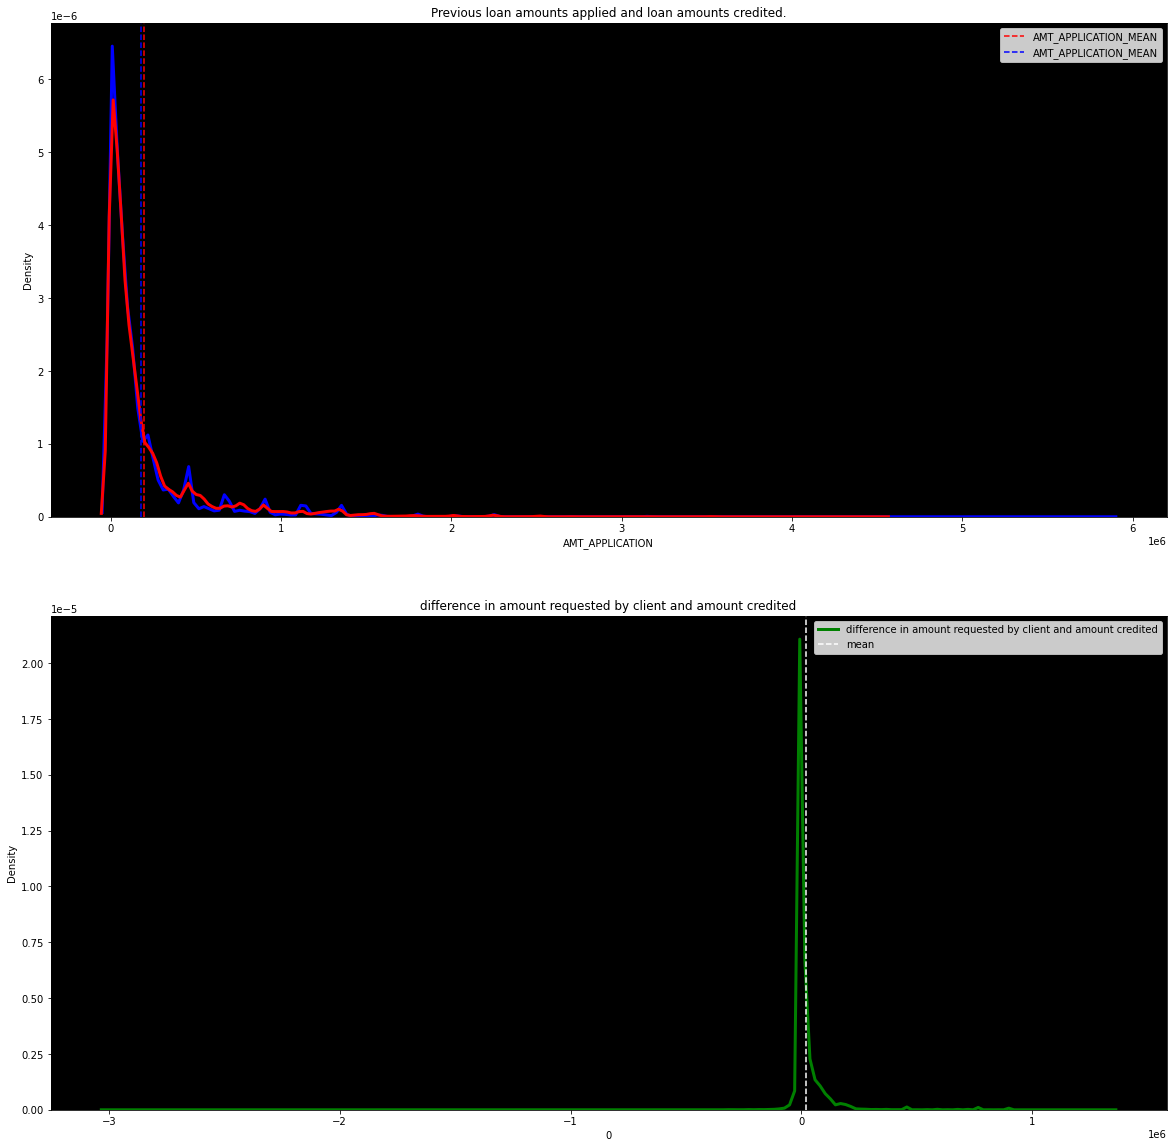

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.kdeplot(combined_df["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(combined_df[combined_df["AMT_CREDIT_y"].notnull()]["AMT_CREDIT_y"],color="r",linewidth=3)
plt.axvline(combined_df[combined_df["AMT_CREDIT_y"].notnull()]["AMT_CREDIT_y"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(combined_df["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")
ax.set_facecolor("k")

plt.subplot(212)
diff = (combined_df["AMT_CREDIT_y"] - combined_df["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")
ax1.set_facecolor("k")

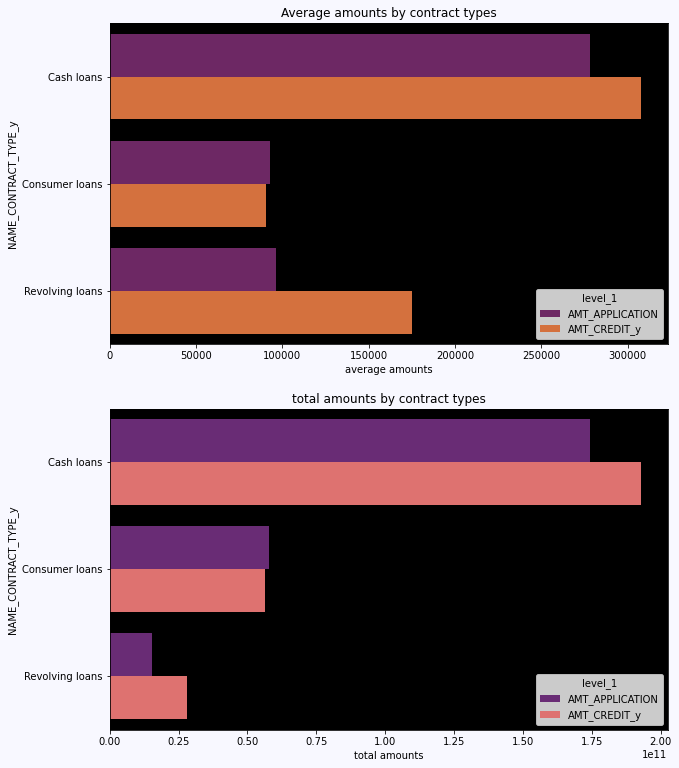

In [40]:
mn = combined_df.groupby("NAME_CONTRACT_TYPE_y")[["AMT_APPLICATION","AMT_CREDIT_y"]].mean().stack().reset_index()
tt = combined_df.groupby("NAME_CONTRACT_TYPE_y")[["AMT_APPLICATION","AMT_CREDIT_y"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE_y",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE_y",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

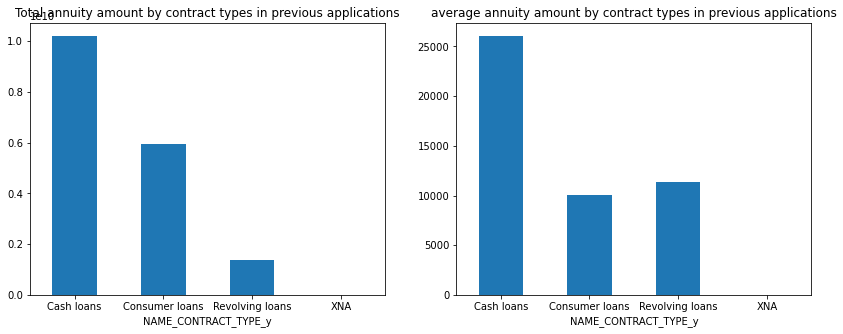

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(121)
combined_df.groupby("NAME_CONTRACT_TYPE_y")["AMT_ANNUITY_y"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
combined_df.groupby("NAME_CONTRACT_TYPE_y")["AMT_ANNUITY_y"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()

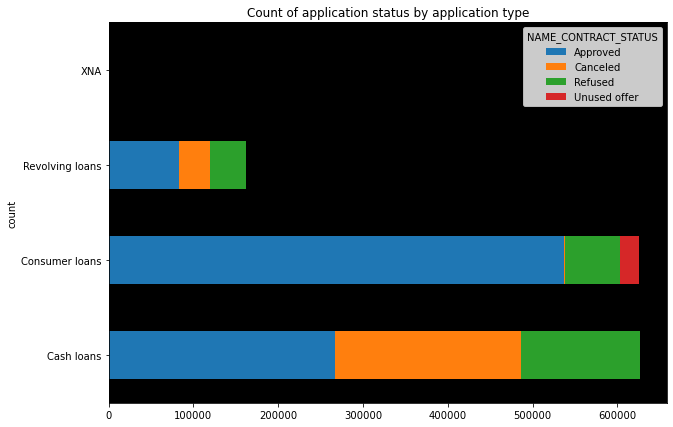

In [42]:
ax = pd.crosstab(combined_df["NAME_CONTRACT_TYPE_y"],combined_df["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

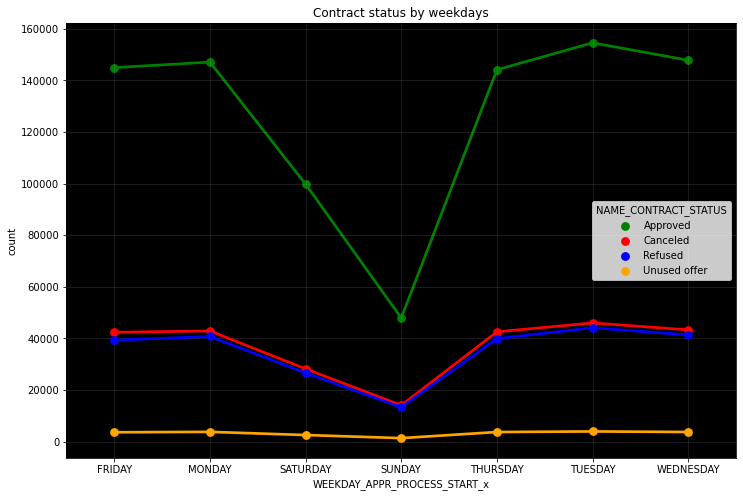

In [43]:
hr = pd.crosstab(combined_df["WEEKDAY_APPR_PROCESS_START_x"],combined_df["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["WEEKDAY_APPR_PROCESS_START_x"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True,alpha=.2)

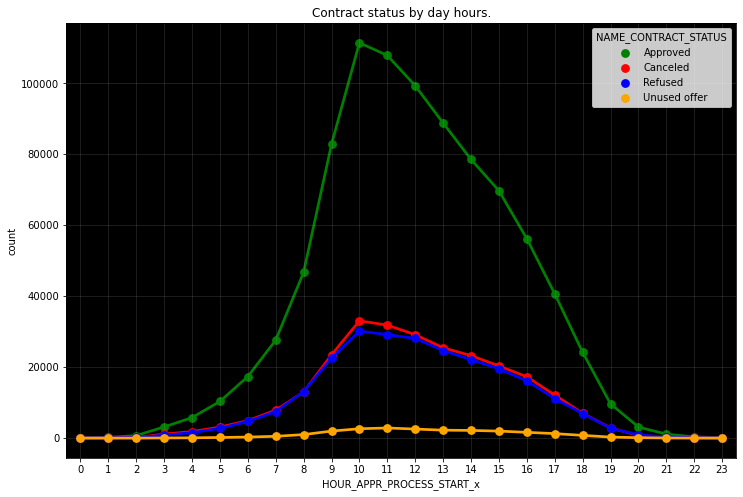

In [44]:
hr = pd.crosstab(combined_df["HOUR_APPR_PROCESS_START_x"],combined_df["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START_x"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

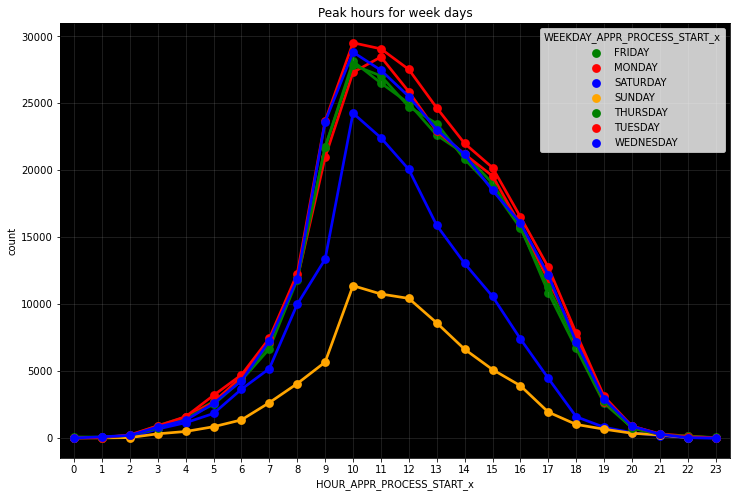

In [45]:
hr = pd.crosstab(combined_df["HOUR_APPR_PROCESS_START_x"],combined_df["WEEKDAY_APPR_PROCESS_START_x"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START_x"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START_x"],palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)

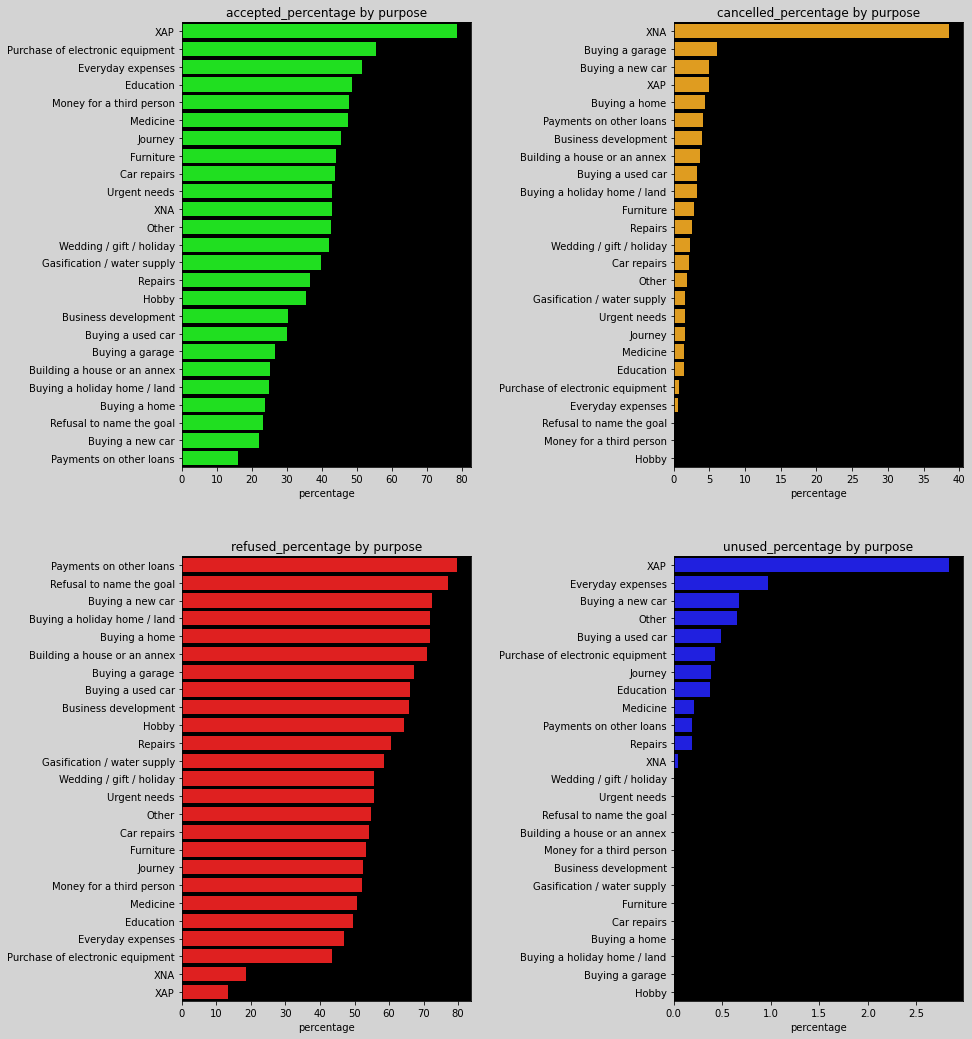

In [46]:
combined_df[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(combined_df["NAME_CASH_LOAN_PURPOSE"],combined_df["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("k")

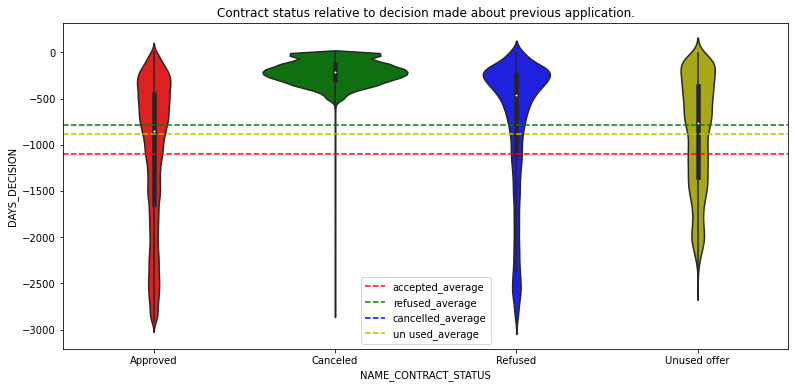

In [47]:
plt.figure(figsize=(13,6))
sns.violinplot(y= combined_df["DAYS_DECISION"],
               x = combined_df["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(combined_df[combined_df["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

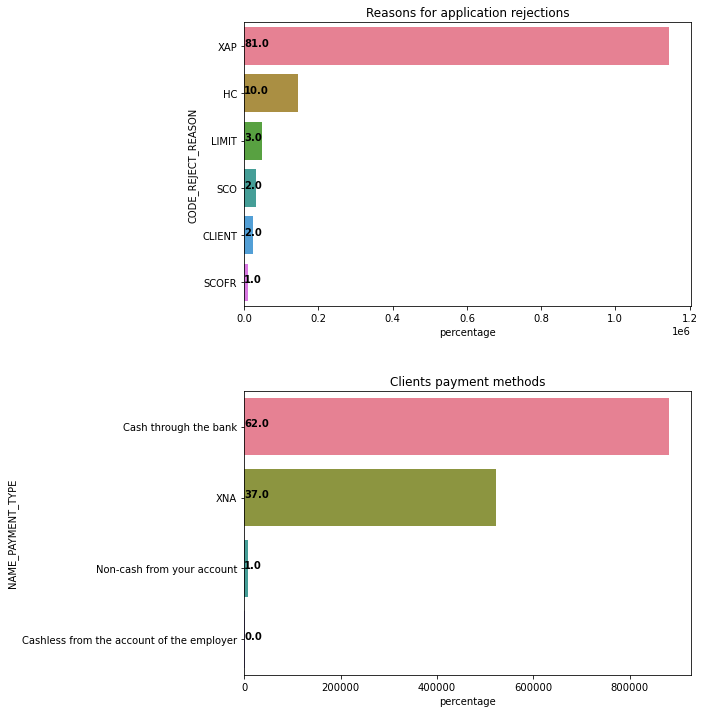

In [48]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = combined_df["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("percentage")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = combined_df["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("percentage")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)

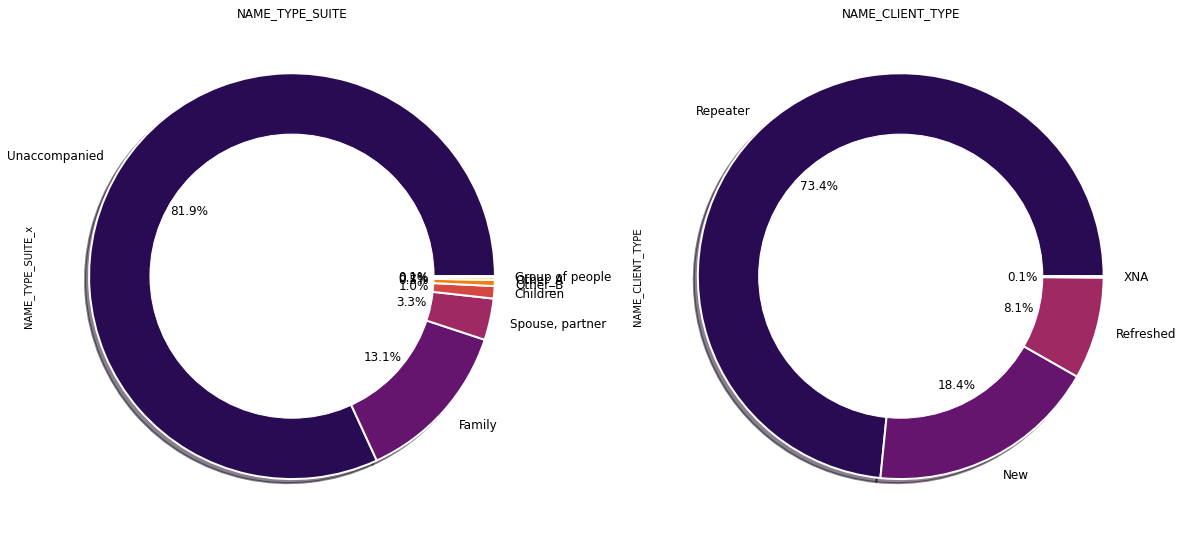

In [49]:
plt.figure(figsize=(20,20))
plt.subplot(121)
combined_df["NAME_TYPE_SUITE_x"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
combined_df["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

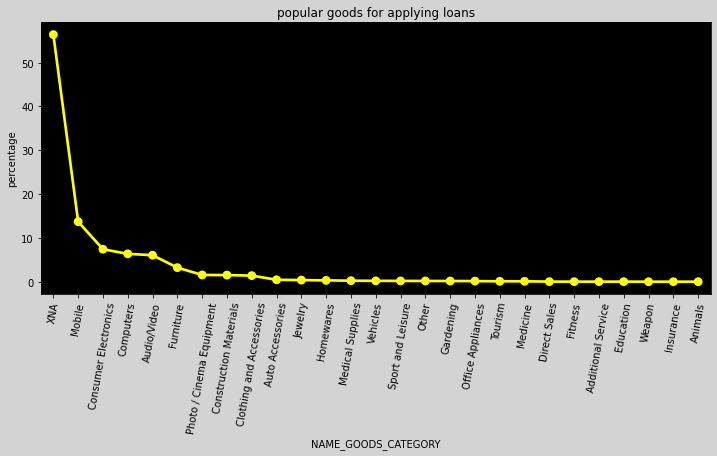

In [50]:
goods = combined_df["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="yellow")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

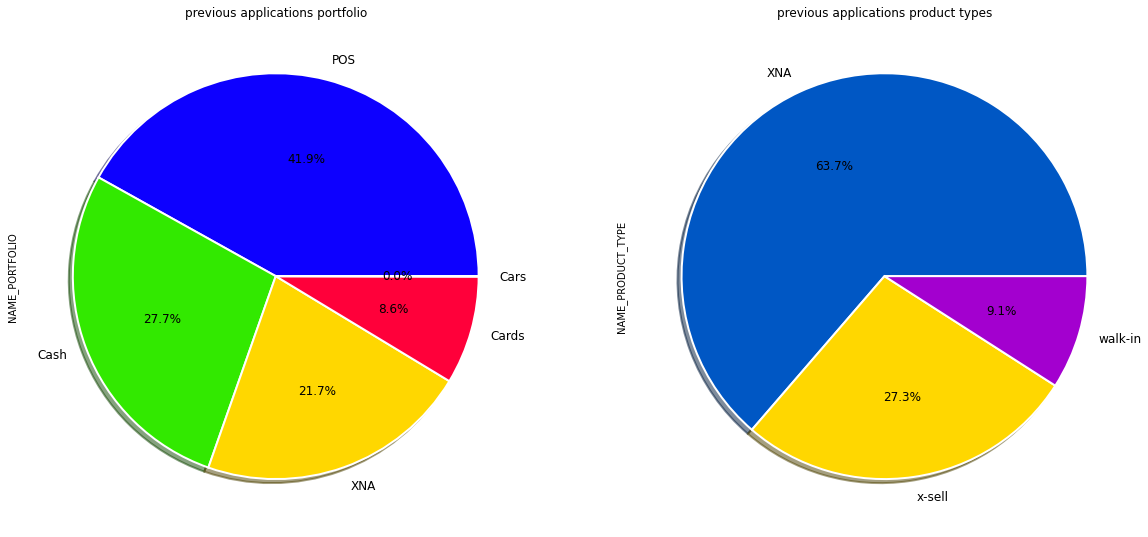

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(121)
combined_df["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
combined_df["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()

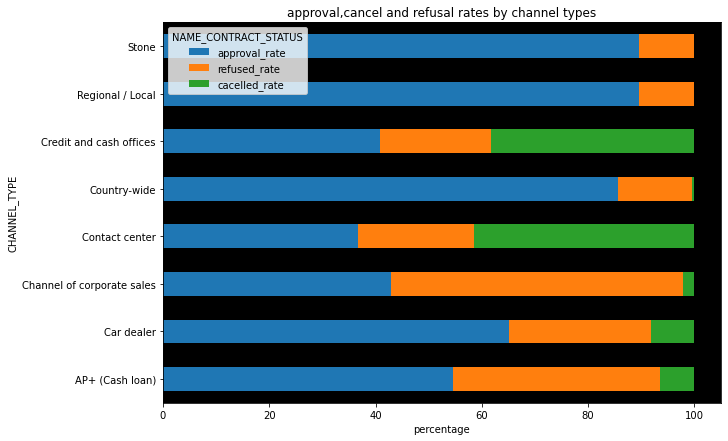

In [52]:
app = pd.crosstab(combined_df["CHANNEL_TYPE"],combined_df["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

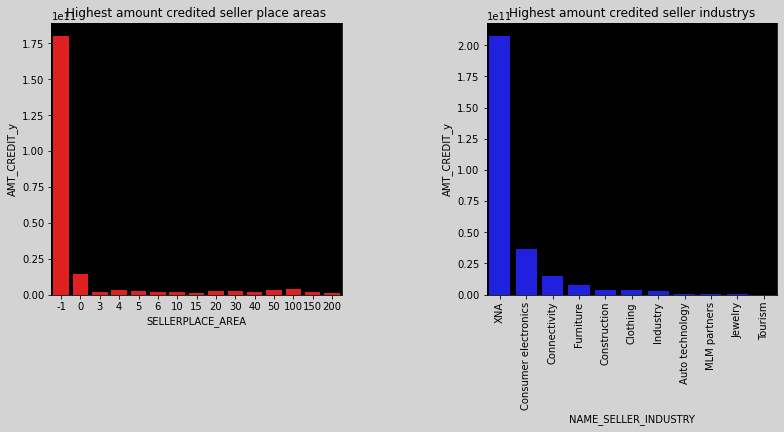

In [53]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = combined_df.groupby("SELLERPLACE_AREA")["AMT_CREDIT_y"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT_y",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT_y",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = combined_df.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT_y"].sum().reset_index().sort_values(by = "AMT_CREDIT_y",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT_y",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")

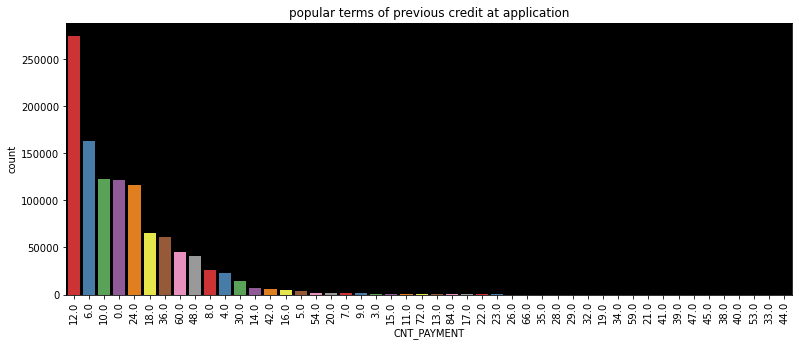

In [54]:
plt.figure(figsize=(13,5))
ax = sns.countplot(combined_df["CNT_PAYMENT"],palette="Set1",order=combined_df["CNT_PAYMENT"].value_counts().index)
ax.set_facecolor("k")
plt.xticks(rotation = 90)
plt.title("popular terms of previous credit at application")
plt.show()

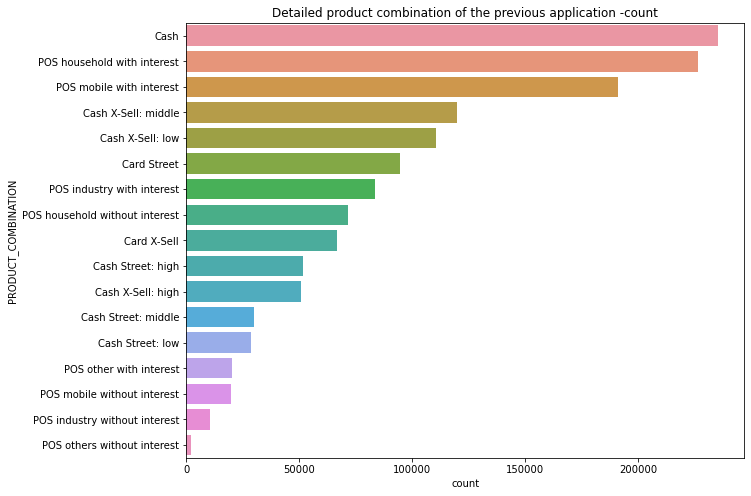

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(y = combined_df["PRODUCT_COMBINATION"],order=combined_df["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()

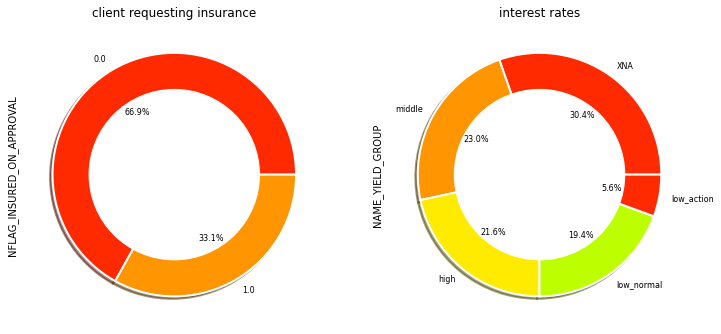

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(121)
combined_df["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
combined_df["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

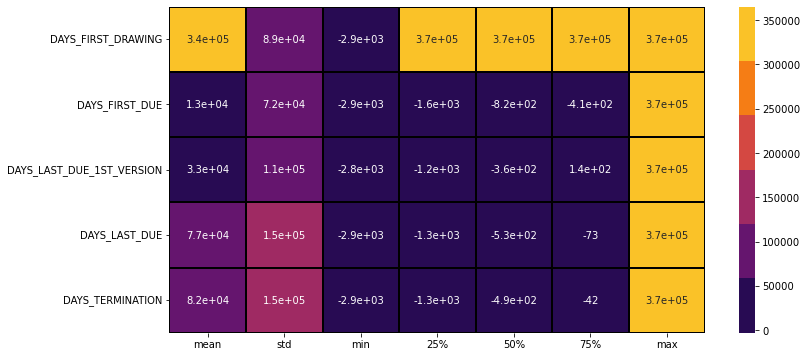

In [57]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(combined_df[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

In [58]:
df_repayer = combined_df[combined_df['TARGET'] == 0]
df_defaulter = combined_df[combined_df['TARGET'] == 1]

In [59]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
4786,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
984,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
2278,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
454,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.99
4787,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
4711,AMT_CREDIT_y,AMT_APPLICATION,0.98
1519,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.94
5547,DAYS_TERMINATION,DAYS_LAST_DUE,0.93
1823,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.88
1352,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88


In [60]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
2278,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
4786,AMT_GOODS_PRICE_y,AMT_APPLICATION,1.00
984,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
4787,AMT_GOODS_PRICE_y,AMT_CREDIT_y,0.99
454,AMT_GOODS_PRICE_x,AMT_CREDIT_x,0.98
4711,AMT_CREDIT_y,AMT_APPLICATION,0.98
1519,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
5547,DAYS_TERMINATION,DAYS_LAST_DUE,0.94
5394,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.89
1352,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
